In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , cross_val_score,GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import time

In [2]:
df =pd.read_excel(r'D:\desktop\datasets\userloss.xlsx')

In [14]:
# 划分特征和标签， 第一列playerid 无实际意义 故不用作特征
X,y = df.iloc[:,1:28].values,df.iloc[:,-1].values
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state = 42)

In [15]:
# 先对初始数据建模 看一下效果
score_train_list = []
score_test_list = []
for c in np.linspace(start = 0.01, stop = 100):
    lr = LogisticRegression(C = c,max_iter=500,penalty="l2")
    lr.fit(Xtrain,ytrain)

    score = lr.score(Xtrain,ytrain)
    score_train_list.append(score)
    score_test_list.append(lr.score(Xtest,ytest))

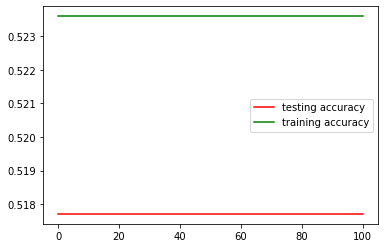

In [16]:
# 对c化学习曲线
plt.plot(list(np.linspace(start = 0.01, stop = 100)),score_test_list,color='red',label='testing accuracy')    
plt.plot(list(np.linspace(start = 0.01, stop = 100)),score_train_list,color='green',label='training accuracy')
plt.legend()
plt.show()

In [17]:
#### 对数据进行归一化
#  对原始数据进行标准化 、然后训练
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state = 0)
scaler = StandardScaler()
Xtrain_scaler=scaler.fit_transform(Xtrain)
Xtest_scaler = scaler.transform(Xtest)

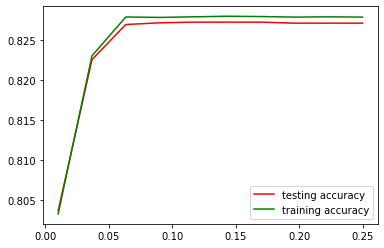

In [18]:
score_train_list = []
score_test_list = []
c_list = np.linspace(start = 0.01, stop = 0.25, num = 10)
for c in c_list:
    lr = LogisticRegression(C =c, max_iter=500,penalty="l2")
    lr.fit(Xtrain_scaler,ytrain)

    score = lr.score(Xtrain_scaler,ytrain)
    score_train_list.append(score)
    score_test_list.append(lr.score(Xtest_scaler,ytest))
plt.plot(list(c_list),score_test_list,color='red',label='testing accuracy')    
plt.plot(list(c_list),score_train_list,color='green',label='training accuracy')
plt.legend()
plt.show()

In [19]:
print("test_train_score:%f"%max(score_train_list))
print("test_best_score:%f"%max(score_test_list))

test_train_score:0.827981
test_best_score:0.827246


In [20]:
#查看一下混淆矩阵

# 计算召回率 
mat=confusion_matrix(ytest,lr.predict(Xtest_scaler))
recall=mat[0][0]/(mat[0][0]+mat[1][0])
recall

0.8650202065559048

In [21]:
score_train_list = []
score_test_list = []
param_grid = {
    "C":[0.001,0.01,0.1,1,10,100],
    "gamma":[0.001,0.01,0.1,1,10,100]
}  

grid = GridSearchCV(SVC(),param_grid=param_grid,cv = 3)

In [22]:
grid.fit(Xtrain_scaler,ytrain)
print("train set score:{:.3f}".format(grid.score(Xtrain_scaler,ytrain)))
print("test set score:{:.3f}".format(grid.score(Xtest_scaler,ytest)))
print("best param dict:{}".format(grid.best_params_))
print("best score:{:.3f}".format(grid.best_score_))
print("best estimators:\n{}".format(grid.best_estimator_))


train set score:0.970
test set score:0.935
best param dict:{'C': 100, 'gamma': 1}
best score:0.916
best estimators:
SVC(C=100, gamma=1)


In [23]:
best = grid.best_params_

In [24]:
confusion_matrix(ytest,grid.predict(Xtest_scaler))

array([[11373,   817],
       [  716, 10584]], dtype=int64)